C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_7032\1639688614.py:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(grayimage1, cmap='gray'), plt.title('Image 1 Grayscale')
C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_7032\1639688614.py:69: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122), plt.imshow(grayimage2, cmap='gray'), plt.title('Image 2 Grayscale')


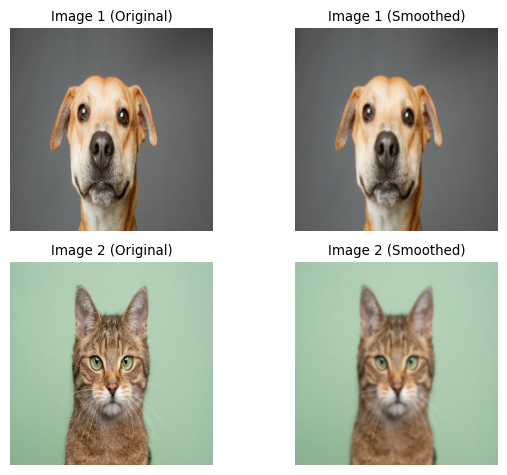

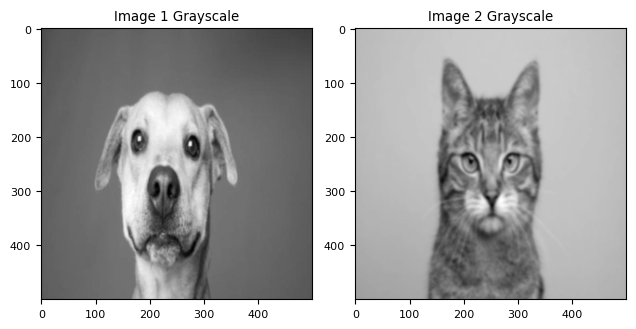

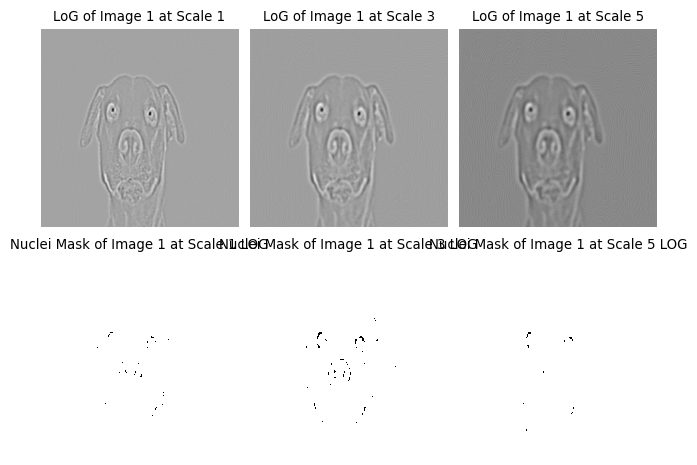

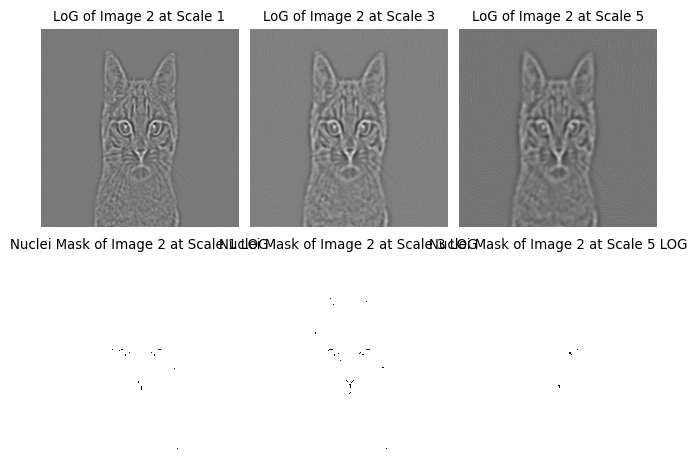

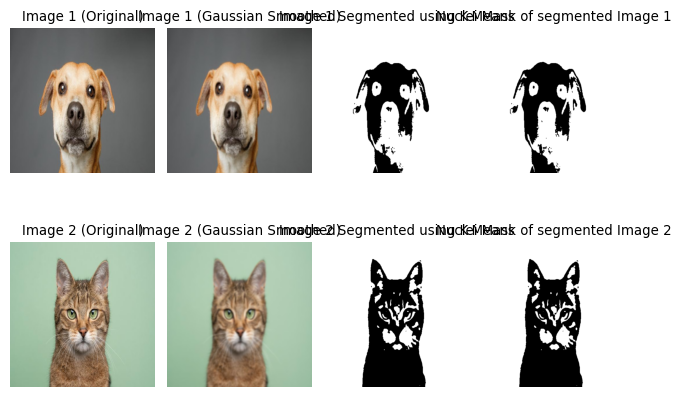

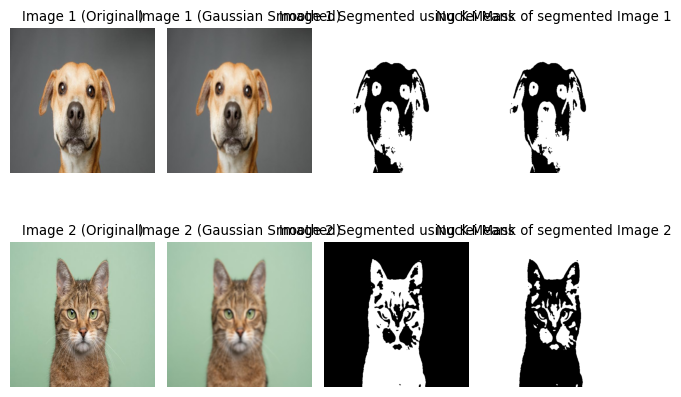

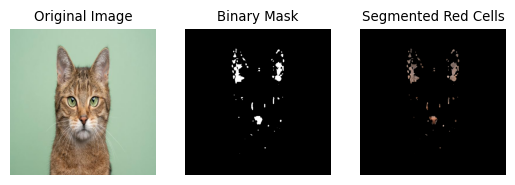

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 8})

# Load the input images
image1 = cv2.imread('dog_crp.jpg')
image2 = cv2.imread('cat_crp.jpg')

#######################################################
# Task-I: Preprocessing ###############################
#######################################################

def preprocessing(image, sigma):
    smoothed_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return smoothed_image

image1_smoothed = preprocessing(image1, 1)
image2_smoothed = preprocessing(image2, 2)

# Plot images for Task-I
fig, axes = plt.subplots(2, 2)
for ax in axes.flat:
    ax.set_axis_off()
plt.subplot(221), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title('Image 1 (Original)')
plt.subplot(222), plt.imshow(cv2.cvtColor(image1_smoothed, cv2.COLOR_BGR2RGB)), plt.title('Image 1 (Smoothed)')
plt.subplot(223), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title('Image 2 (Original)')
plt.subplot(224), plt.imshow(cv2.cvtColor(image2_smoothed, cv2.COLOR_BGR2RGB)), plt.title('Image 2 (Smoothed)')
plt.tight_layout() 




#######################################################
# Task-II: Blob Detection #############################
#######################################################

def blob_detection(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sigmas = [2, 3, 4]

    # Laplacian of Gaussian (LoG) filter
    blobImages = []
    nucleiMasks = []
    for sigma in sigmas:
        gaussianFilter = cv2.GaussianBlur(gray, (0, 0), sigma)
        laplacian = (cv2.Laplacian(gaussianFilter, cv2.CV_64F)) * sigma ** 2
        # blob_filter = cv2.GaussianBlur(gray, (0, 0), scale)
        # blob_filter = cv2.Laplacian(blob_filter, cv2.CV_64F)
        # abs_blobs = cv2.convertScaleAbs(blob_filter)
        # sqrr=scale**2*abs_blobs
        blobImages.append(laplacian)
        
        binaryMask = cv2.threshold(laplacian, 5, 255, cv2.THRESH_BINARY)[1]
        nucleiMasks.append(cv2.bitwise_not(binaryMask))
        
    return gray, blobImages, nucleiMasks

grayimage1, image1Blobs, image1Masks = blob_detection(image1_smoothed)
grayimage2, image2Blobs, image2Masks = blob_detection(image2_smoothed)

# Plot output images for Task-II
fig, axes = plt.subplots(2, 3)
for ax in axes.flat:
    ax.set_axis_off()
plt.subplot(121), plt.imshow(grayimage1, cmap='gray'), plt.title('Image 1 Grayscale')
plt.subplot(122), plt.imshow(grayimage2, cmap='gray'), plt.title('Image 2 Grayscale')
plt.tight_layout() 

fig, axes = plt.subplots(2, 3)
for ax in axes.flat:
    ax.set_axis_off()
plt.subplot(231), plt.imshow(image1Blobs[0], cmap='gray'), plt.title('LoG of Image 1 at Scale 1')
plt.subplot(232), plt.imshow(image1Blobs[1], cmap='gray'), plt.title('LoG of Image 1 at Scale 3')
plt.subplot(233), plt.imshow(image1Blobs[2], cmap='gray'), plt.title('LoG of Image 1 at Scale 5')
plt.subplot(234), plt.imshow(image1Masks[0], cmap='gray'), plt.title('Nuclei Mask of Image 1 at Scale 1 LOG')
plt.subplot(235), plt.imshow(image1Masks[1], cmap='gray'), plt.title('Nuclei Mask of Image 1 at Scale 3 LOG')
plt.subplot(236), plt.imshow(image1Masks[2], cmap='gray'), plt.title('Nuclei Mask of Image 1 at Scale 5 LOG')
plt.tight_layout() 

fig, axes = plt.subplots(2, 3)
for ax in axes.flat:
    ax.set_axis_off()
plt.subplot(231), plt.imshow(image2Blobs[0], cmap='gray'), plt.title('LoG of Image 2 at Scale 1')
plt.subplot(232), plt.imshow(image2Blobs[1], cmap='gray'), plt.title('LoG of Image 2 at Scale 3')
plt.subplot(233), plt.imshow(image2Blobs[2], cmap='gray'), plt.title('LoG of Image 2 at Scale 5')
plt.subplot(234), plt.imshow(image2Masks[0], cmap='gray'), plt.title('Nuclei Mask of Image 2 at Scale 1 LOG')
plt.subplot(235), plt.imshow(image2Masks[1], cmap='gray'), plt.title('Nuclei Mask of Image 2 at Scale 3 LOG')
plt.subplot(236), plt.imshow(image2Masks[2], cmap='gray'), plt.title('Nuclei Mask of Image 2 at Scale 5 LOG')
plt.tight_layout() 






#######################################################
# Task-III: Image Segmentation using K-means ##########
#######################################################

### Segment cells using color feature vector
def k_means_segmentation(image, k, threshold):
    pixels = image.reshape((-1, 3)).astype(np.float32)

    # Apply K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    segmented_image = labels.reshape((image.shape[:2]))

    # nuclei mask
    nuclei_mask_invert = (segmented_image == threshold).astype(np.uint8) * 255
    # ret, nuclei_mask_invert = cv2.threshold(segmented_image.astype(np.uint8), threshold, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # nuclei_mask = cv2.bitwise_not(nuclei_mask_invert) 

    return segmented_image, nuclei_mask_invert

image1_segmented, image1_nuclei_mask = k_means_segmentation(image1_smoothed, 2, 1)
image2_segmented, image2_nuclei_mask = k_means_segmentation(image2_smoothed, 2, 1)

# Plot images for Task-III
fig, axes = plt.subplots(2, 4)
for ax in axes.flat:
    ax.set_axis_off()
plt.subplot(241), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title('Image 1 (Original)')
plt.subplot(242), plt.imshow(cv2.cvtColor(image1_smoothed, cv2.COLOR_BGR2RGB)), plt.title('Image 1 (Gaussian Smoothed)')
plt.subplot(243), plt.imshow(image1_segmented, cmap='gray'), plt.title('Image 1 Segmented using K-Means')
plt.subplot(244), plt.imshow(image1_nuclei_mask, cmap='gray'), plt.title('Nuclei Mask of segmented Image 1')
plt.subplot(245), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title('Image 2 (Original)')
plt.subplot(246), plt.imshow(cv2.cvtColor(image2_smoothed, cv2.COLOR_BGR2RGB)), plt.title('Image 2 (Gaussian Smoothed)')
plt.subplot(247), plt.imshow(image2_segmented, cmap='gray'), plt.title('Image 2 Segmented using K-Means')
plt.subplot(248), plt.imshow(image2_nuclei_mask, cmap='gray'), plt.title('Nuclei Mask of segmented Image 2')
plt.tight_layout() 





### Segment cells using intensity feature vector
def k_means_segmentation(image, k, threshold):
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert the grayscale image to a 1D array of intensities
    intensity_values = gray_image.ravel()

    # Stack the intensity values into a 2D array for k-means clustering
    intensity_features = np.column_stack((intensity_values,)).astype(np.float32)

    # Apply k-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(intensity_features, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    segmented_image = labels.reshape(gray_image.shape)

    # nuclei mask
    nuclei_mask = (segmented_image == threshold).astype(np.uint8)

    return segmented_image, nuclei_mask

image1_segmented, image1_nuclei_mask = k_means_segmentation(image1_smoothed, 2, 1)
image2_segmented, image2_nuclei_mask = k_means_segmentation(image2_smoothed, 2, 0)

# Plot images
fig, axes = plt.subplots(2, 4)
for ax in axes.flat:
    ax.set_axis_off()
plt.subplot(241), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title('Image 1 (Original)')
plt.subplot(242), plt.imshow(cv2.cvtColor(image1_smoothed, cv2.COLOR_BGR2RGB)), plt.title('Image 1 (Gaussian Smoothed)')
plt.subplot(243), plt.imshow(image1_segmented, cmap='gray'), plt.title('Image 1 Segmented using K-Means')
plt.subplot(244), plt.imshow(image1_nuclei_mask, cmap='gray'), plt.title('Nuclei Mask of segmented Image 1')
plt.subplot(245), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title('Image 2 (Original)')
plt.subplot(246), plt.imshow(cv2.cvtColor(image2_smoothed, cv2.COLOR_BGR2RGB)), plt.title('Image 2 (Gaussian Smoothed)')
plt.subplot(247), plt.imshow(image2_segmented, cmap='gray'), plt.title('Image 2 Segmented using K-Means')
plt.subplot(248), plt.imshow(image2_nuclei_mask, cmap='gray'), plt.title('Nuclei Mask of segmented Image 2')
plt.tight_layout() 





# Task-IV: Image Segmentation (Red Blobs)
def red_blob_segmentation(image):

    # Convert the image to the HSV color space
    hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for red color in HSV
    # lower_red = np.array([0, 50, 50])
    # upper_red = np.array([20, 255, 255])

    # lower mask (0-10)
    lowerRed = np.array([0,50,50])
    upperRed = np.array([10,255,255])
    lowermask = cv2.inRange(hsvImage, lowerRed, upperRed)

    # upper mask (170-180)
    lowerRed = np.0,255,255])
    uppermask = cv2.iarray([170,50,50])
    upperRed = np.array([18nRange(hsvImage, lowerRed, upperRed)

    red_mask = lowermask+uppermask

    # Create a mask to select only the red color
    # red_mask = cv2.inRange(hsv_image, lower_red, upper_red)

    # Apply Gaussian blur to the mask to reduce noise
    red_mask = cv2.GaussianBlur(red_mask, (5, 5), 0)

    # Threshold the blurred mask to create a binary mask
    _, binaryMask = cv2.threshold(red_mask, 30, 255, cv2.THRESH_BINARY)

    # Apply the binary mask to the original image
    result = cv2.bitwise_and(image, image, mask=binaryMask)
    
    return result, binaryMask

image2_segmented_red, image2_red_mask = red_blob_segmentation(image2)

# Display the original image, binary mask, and segmented image
fig, axes = plt.subplots(1, 3)
for ax in axes.flat:
    ax.set_axis_off()
plt.subplot(131), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(image2_red_mask, cmap='gray'), plt.title('Binary Mask')
plt.subplot(133), plt.imshow(cv2.cvtColor(image2_segmented_red, cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Segmented Red Cells')

# Show all four plot figures
plt.show()

